# Machine learning with Linear Regression
In this micro-project, we'll be using Linear Regression model to help a fictional ecommerce store decide where to focus their IT effort.

## Background

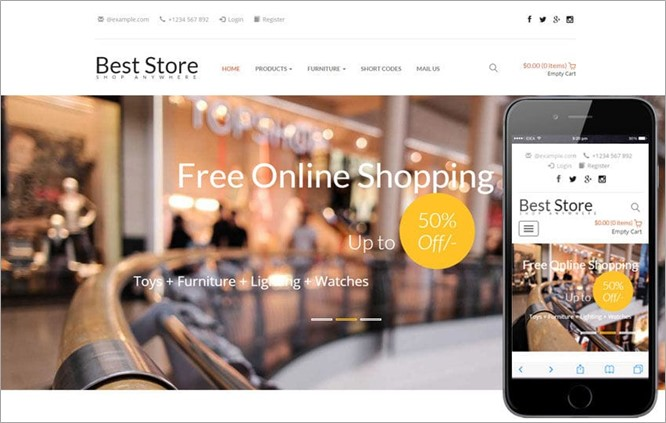

XYZ is an ecommerce Company that sells luxury clothing online. They also have a physical clothing store located in town where customers can come into the store to try out new clothing lines and go back home to order either on the website or mobile app. 

## Business problem

Due to the pandemic and the trend of trying out in-store and buying online, e-commerce sales have outstripped in-store sales. The company would like to enhance their online experience, but their IT resource is limited. Therefore, we are helping to analyse the company data and advise which platform should the store focus on in order to bring in the best returns. 

The goal for this project is to determine whether time spent on Website or Mobile App has a stronger correlation to the amount of money spent by an individual customer.

## Imports

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

## Reviewing the data

In [5]:
df =pd.read_csv("Ecommerce Customers.csv")

Checking out the head of the dataset, info() and describe() methods.

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Check for null values

In [9]:
df.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

As the dataset is cleaned, we can start exploring the data

## Exploratory Data Exploratory

**Jointplot to compare the Time on Website and Yearly Amount Spent columns.**

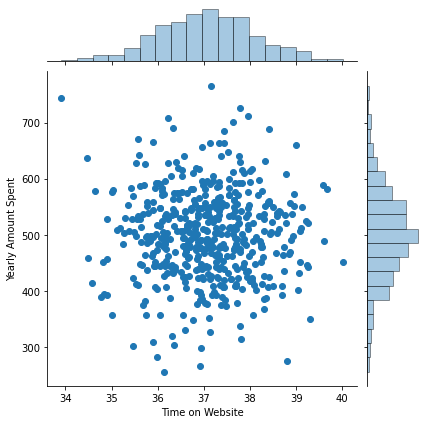

In [10]:
sns.jointplot("Time on Website", "Yearly Amount Spent", df)

No clear correlation observation

**Jointplot to compare the Time on app and Yearly Amount Spent columns.**

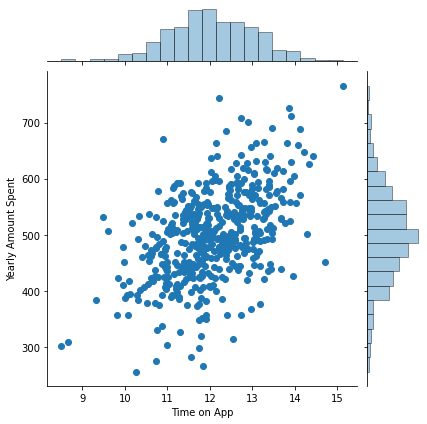

In [11]:
sns.jointplot("Time on App", "Yearly Amount Spent", df)

Some linear correlation can be observed

## Selecting data

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

As not all columns is required for our data analysis, we will be selecting only data with numerical attributes.

In [13]:
clean_df = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

clean_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


**Use Pairplot to compare all numerical attributes for an overview**

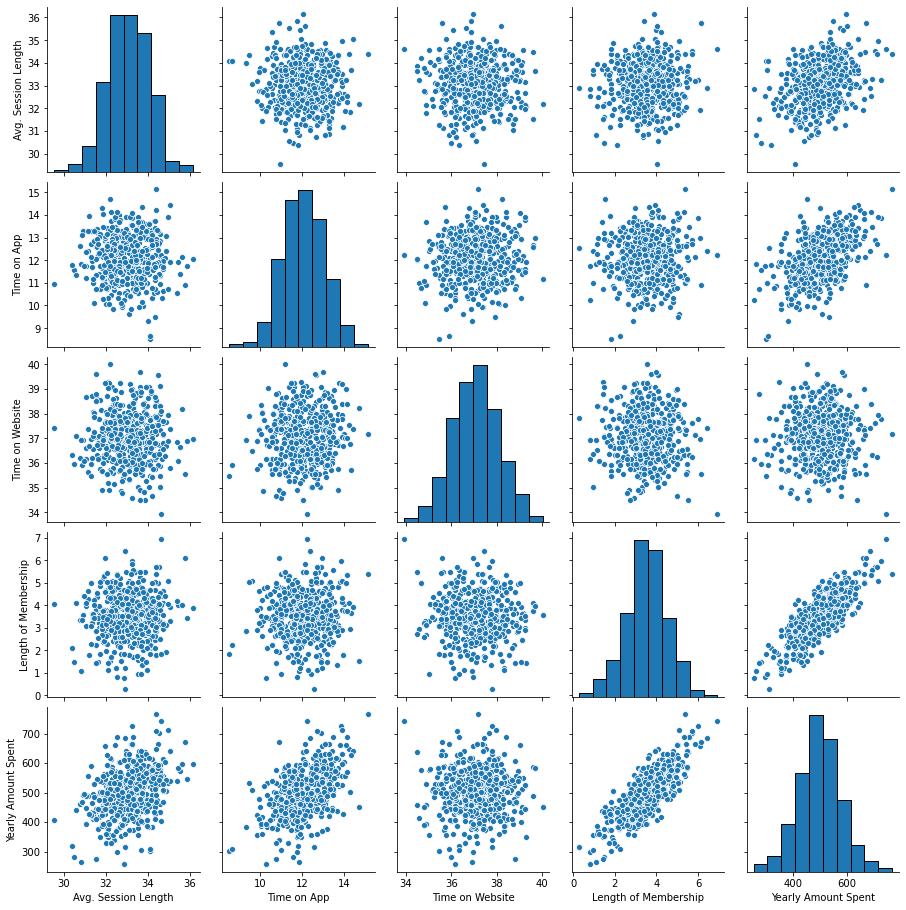

In [15]:
sns.pairplot(df)

Based on the above plot, the most correlated feature with yearly amount spent seems to be membership.  Let's look at the linear model plot between membership length and yearly amount spent.

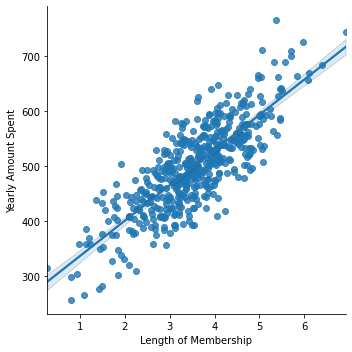

In [16]:
sns.lmplot("Length of Membership", "Yearly Amount Spent", df)

Strong correlation can be observed between membership length and amount spent

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [33]:
X= df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df["Yearly Amount Spent"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.3, random_state = 101)

## Training the model

In [21]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [22]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values.

In [24]:
predictions = lm.predict(X_test)

In [25]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'predicted value')

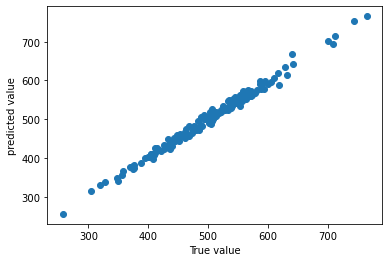

In [26]:
# Create a scatterplot of real test values versus predicted values

plt.scatter(y_test, predictions)
plt.xlabel("True value")
plt.ylabel("predicted value")

## Evaluating the model

Evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [27]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE= np.sqrt(metrics.mean_squared_error(y_test,predictions))

print(f"MAE : {MAE} \nMSE: {MSE} \nRMSE : {RMSE}")

MAE : 7.228148653430839 
MSE: 79.81305165097469 
RMSE : 8.933815066978648


In [28]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

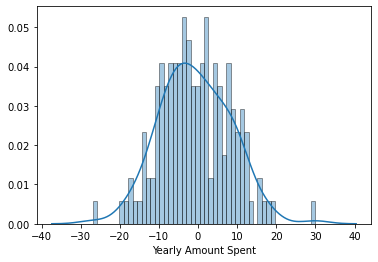

In [29]:
#Visualizing the model
sns.distplot(y_test - predictions, bins=50)

From the above, we can see that the model is evenly distributed and have high accuracy

## Conclusion

We want to figure out the answer to the business objective which is whether the company should focus on mobile app or web development. We can do this by intepreting the coefficients obtained from the model.

In [30]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coeff"])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The above shows that the biggest influence on amount spent is membership followed by time spent on app.

**Should the company focus on mobile app or web development ?**

The company can focus more on mobile App to further increase client spending <br>
Website can be focused on if client wants to catch up to app level

Need more information on the cost of the decision to choose a correct focus